In [2]:
#Loading the required python packages 
import os
import sys
import argparse
import csv
import re
from io import StringIO
import pandas as pd

In [3]:
#here am defining the regex pattern to help me identify the ip address
##indentifier and other important data from an access log line

parts = [
    r'"(?P<host>\S+)',                   # host %h
    r'(?P<indent>\S+)',                             # indent %l (unused)
    r'(?P<user>\S+)',                   # user %u
    r'\[(?P<time>.+)\]',                # time %t
    r'"(?P<method>\w+)',                #action
    r'(?P<request_path>.+)"',               # request "%r"
    r'(?P<status>[0-9]+)',              # status %>s
    r'(?P<size>\S+)',                   # size %b (careful, can be '-')
    r'"(?P<referer>.*)"',               # referer "%{Referer}i"
    r'"(?P<agent>.*)"',                 # user agent "%{User-agent}i"
]
pattern = re.compile(r'\s+'.join(parts)+r'\s*\Z')#storing  the pattern in the a pattern varriable using re python module

In [4]:
# LOG_REGEX = '(?P<ip>[(\d\.)]+) (?P<indent>\S+) (?P<user>\S+) \[(?P<date>.*?) -(.*?)\] "(?P<method>\w+) (?P<request_path>.*?) HTTP/(?P<http_version>.*?)" (?P<status_code>\d+) (?P<response_size>\d+) "(?P<referrer>.*?)" "(?P<user_agent>.*?)"'

In [5]:
# compiled = re.compile(LOG_REGEX)

In [6]:

f = open("data/netsparker.txt","r")#loading the data file using open function in python
contents = f.readlines()#assign/storing  the lines read from the access log file in the contents varriable 
data = [] #here am defining a list to store the attributes got from log line
for line in contents:
    m = pattern.match(line)#here i match the line regex 
    res = m.groupdict()#group the results from the matching into a dictionary
    data.append(res)#and finally append the results into a dictionary 

In [7]:
data

[{'host': '192.168.4.164',
  'indent': '-',
  'user': '-',
  'time': '22/Dec/2016:15:19:05 +0300',
  'method': 'GET',
  'request_path': '/DVWA/ HTTP/1.1',
  'status': '200',
  'size': '2020',
  'referer': '-',
  'agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.16 Safari/537.36"'},
 {'host': '192.168.4.164',
  'indent': '-',
  'user': '-',
  'time': '22/Dec/2016:15:19:06 +0300',
  'method': 'HEAD',
  'request_path': '/DVWA/ HTTP/1.1',
  'status': '200',
  'size': '263',
  'referer': '-',
  'agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.16 Safari/537.36"'},
 {'host': '192.168.4.164',
  'indent': '-',
  'user': '-',
  'time': '22/Dec/2016:15:19:06 +0300',
  'method': 'HEAD',
  'request_path': '/DVWA/.git/config HTTP/1.1',
  'status': '404',
  'size': '139',
  'referer': '-',
  'agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.16 Sa

In [8]:
##create a csv file to store created data as a csv file
csv_columns = ['host','indent','user','time','method','request_path','status','size','referer','agent']
csv_file = "netsparker.csv"#define the file to be created
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for df in data:
            writer.writerow(df)
except IOError:
    print("I/O error")

In [9]:
df = pd.read_csv("data/netsparker.csv")#load the csv file created using pandas python module

In [11]:
df['tool'] = "netsparker"

In [12]:
df

,host,tool,indent,user,time,method,request_path,status,size,referer,agent,Unnamed: 11,Unnamed: 12
0,192.168.4.164,netsparker,-,-,22/Dec/2016:15:19:05 +0300,GET,/DVWA/ HTTP/1.1,200,2020,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,NaN,NaN
1,192.168.4.164,netsparker,-,-,22/Dec/2016:15:19:06 +0300,HEAD,/DVWA/ HTTP/1.1,200,263,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,NaN,NaN
2,192.168.4.164,netsparker,-,-,22/Dec/2016:15:19:06 +0300,HEAD,/DVWA/.git/config HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,NaN,NaN
3,192.168.4.164,netsparker,-,-,22/Dec/2016:15:19:06 +0300,HEAD,/DVWA/.git/config HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,NaN,NaN
4,192.168.4.164,netsparker,-,-,22/Dec/2016:15:19:06 +0300,HEAD,/DVWA/.svn/all-wcprops HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7309,192.168.4.164,netsparker,-,-,22/Dec/2016:15:37:15 +0300,POST,/DVWA/vulnerabilities/exec/ HTTP/1.1,200,1714,http://192.168.4.161/DVWA/vulnerabilities/exec/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,NaN,NaN
7310,192.168.4.164,netsparker,-,-,22/Dec/2016:15:37:15 +0300,POST,/DVWA/vulnerabilities/exec/ HTTP/1.1,200,1714,http://192.168.4.161/DVWA/vulnerabilities/exec/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,NaN,NaN
7311,192.168.4.164,netsparker,-,-,22/Dec/2016:15:37:27 +0300,POST,/DVWA/vulnerabilities/exec/ HTTP/1.1,200,1714,http://192.168.4.161/DVWA/vulnerabilities/exec/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,NaN,NaN
7312,192.168.4.164,netsparker,-,-,22/Dec/2016:15:37:27 +0300,POST,/DVWA/vulnerabilities/exec/ HTTP/1.1,200,1714,http://192.168.4.161/DVWA/vulnerabilities/exec/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,NaN,NaN


In [13]:
df.to_csv('netsparkernew.csv',index=False)

In [53]:
df_host_unique = df.groupby('host').count()

In [54]:
df_host_unique

,indent,user,time,method,request_path,status,size,referer,agent
host,,,,,,,,,
192.168.4.164,7314,7314,7314,7314,7314,7314,7314,7314,7314


In [55]:
df_method_unique =df.groupby('method').count()

In [56]:
df_method_unique

,host,indent,user,time,request_path,status,size,referer,agent
method,,,,,,,,,
GET,4004,4004,4004,4004,4004,4004,4004,4004,4004
HEAD,2038,2038,2038,2038,2038,2038,2038,2038,2038
NETSPARKER,1,1,1,1,1,1,1,1,1
OPTIONS,34,34,34,34,34,34,34,34,34
POST,1203,1203,1203,1203,1203,1203,1203,1203,1203
PROPFIND,34,34,34,34,34,34,34,34,34


In [57]:
df_status_unique = df.groupby('status').count()

In [58]:
df_status_unique

,host,indent,user,time,method,request_path,size,referer,agent
status,,,,,,,,,
200,3784,3784,3784,3784,3784,3784,3784,3784,3784
302,910,910,910,910,910,910,910,910,910
404,2602,2602,2602,2602,2602,2602,2602,2602,2602
405,12,12,12,12,12,12,12,12,12
500,6,6,6,6,6,6,6,6,6


In [59]:
size_summary = df['size'].describe()

In [60]:
size_summary

count     7314.000000
mean       806.784249
std       1356.009850
min        126.000000
25%        139.000000
50%        668.000000
75%       1005.000000
max      19669.000000
Name: size, dtype: float64

In [61]:
# from pyspark.sql import SparkSession

# spark = SparkSession \
#     .builder \
#     .appName("Python Spark SQL basic example") \
#     .config("spark.some.config.option", "some-value") \
#     .getOrCreate()

# df_spark = spark.read.csv("data/acunetix.csv",header=True,sep="|");

In [62]:
# df_spark.toPandas()

In [63]:
from pyspark.sql import functions as F

In [64]:
# (df.agg(F.min(df['size']).alias('min_content_size'),
#              F.max(df['size']).alias('max_content_size'),
#              F.mean(df['size']).alias('mean_content_size'),
#              F.stddev(df['size']).alias('std_content_size'),
#              F.count(df['size']).alias('count_content_size')).toPandas())

In [65]:
status_freq_df=(df
              .groupby('status')
               
              .count())
print("Total distinct HTTP Status codes:",status_freq_df.count())

Total distinct HTTP Status codes: host            5
indent          5
user            5
time            5
method          5
request_path    5
size            5
referer         5
agent           5
dtype: int64


In [66]:
status_freq_df= df.groupby(["status", "host"])['agent'].count().reset_index(name="count")

In [67]:
status_freq_pd_df = (status_freq_df
                         .sort_values(by=['host'],
                                      ascending=False))

In [68]:
# df = df.sort_values(by=['status','count'])
status_freq_pd_df

,status,host,count
0,200,192.168.4.164,3784
1,302,192.168.4.164,910
2,404,192.168.4.164,2602
3,405,192.168.4.164,12
4,500,192.168.4.164,6


In [69]:
status_freq_pd_df = status_freq_pd_df.drop(['host'],axis=1)

In [70]:
status_freq_pd_df

,status,count
0,200,3784
1,302,910
2,404,2602
3,405,12
4,500,6


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplot inline 

UsageError: Line magic function `%matplot` not found.


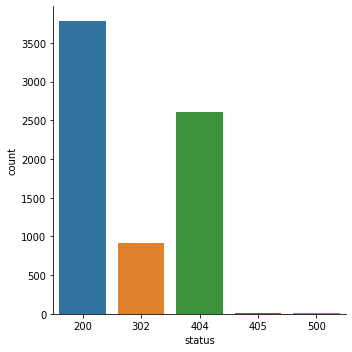

In [72]:
sns.catplot(x='status',y='count',data=status_freq_pd_df,kind='bar',order=status_freq_pd_df['status'])

In [73]:
import pyspark
from pyspark.sql import SparkSession

In [74]:
# # spark = SparkSession.builder.appName('pandasToSparkDF').getOrCreate()
# spark.conf.set("spark.sql.execution.arrow.enabled", "true")
# df_spark = spark.createDataFrame(status_freq_pd_df)

In [75]:
# df_spark

In [76]:
# log_freq_df = df_spark.withColumn('log(count)',
#                                         F.log(df_spark['count']))
# log_freq_df.show()

In [77]:
# log_freq_pd_df = (log_freq_df
#                     .toPandas()
#                     .sort_values(by=['log(count)'],
#                                  ascending=False))
# sns.catplot(x='status', y='log(count)', data=log_freq_pd_df,
#             kind='bar', order=status_freq_pd_df['status'])

In [78]:
host_sum_df =(df
               .groupby('host')
               .count())

host_sum_df

,indent,user,time,method,request_path,status,size,referer,agent
host,,,,,,,,,
192.168.4.164,7314,7314,7314,7314,7314,7314,7314,7314,7314


In [79]:
# host_sum_pd_df = host_sum_df
# host_sum_pd_df.iloc[8]['host']

In [80]:
paths_df = (df
            .groupby('request_path')['status']
            .count().reset_index(name="count"))

paths_df

,request_path,count
0,/DVWA/ HTTP/1.1,17
1,/DVWA/%0Ans:netsparker056650=vuln HTTP/1.1,1
2,/DVWA/%0D%0Ans:netsparker056650=vuln HTTP/1.1,1
3,/DVWA/%20ns=netsparker(0x000012) HTTP/1.1,1
4,/DVWA/%20ns=netsparker(0x000013) HTTP/1.1,1
...,...,...
4663,/DVWA/wpes.php HTTP/1.1,2
4664,/DVWA/wsdl/ HTTP/1.1,2
4665,/DVWA/~.aspx HTTP/1.1,2
4666,/dvwa/ HTTP/1.1,1


In [81]:
not200_df = df.loc[df['status'] !=200]


In [82]:
not200_df

,host,indent,user,time,method,request_path,status,size,referer,agent
2,192.168.4.164,-,-,22/Dec/2016:15:19:06 +0300,HEAD,/DVWA/.git/config HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
3,192.168.4.164,-,-,22/Dec/2016:15:19:06 +0300,HEAD,/DVWA/.git/config HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
4,192.168.4.164,-,-,22/Dec/2016:15:19:06 +0300,HEAD,/DVWA/.svn/all-wcprops HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
5,192.168.4.164,-,-,22/Dec/2016:15:19:06 +0300,HEAD,/DVWA/.svn/all-wcprops HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
6,192.168.4.164,-,-,22/Dec/2016:15:19:06 +0300,HEAD,/DVWA/.svn/wc.db HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
...,...,...,...,...,...,...,...,...,...,...
7281,192.168.4.164,-,-,22/Dec/2016:15:35:03 +0300,GET,/DVWA/vulnerabilities/brute/include.php?nsextt...,404,529,http://192.168.4.161/DVWA/vulnerabilities/brute/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
7292,192.168.4.164,-,-,22/Dec/2016:15:35:04 +0300,GET,/DVWA/vulnerabilities/brute/include.php HTTP/1.1,404,529,ns:netsparker056650=vuln,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
7293,192.168.4.164,-,-,22/Dec/2016:15:35:04 +0300,GET,/DVWA/vulnerabilities/brute/include.php%0Ans:n...,404,554,http://192.168.4.161/DVWA/vulnerabilities/brute/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
7294,192.168.4.164,-,-,22/Dec/2016:15:35:04 +0300,GET,/DVWA/vulnerabilities/brute/include.php%0D%0An...,404,555,http://192.168.4.161/DVWA/vulnerabilities/brute/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...


In [83]:
error_endpoints_freq_df = (not200_df
                               .groupby('request_path')['status']
                               .count().reset_index(name="count"))
                              
                        

In [84]:
error_endpoints_freq_df.sample(20)

,request_path,count
1453,/DVWA/vulnerabilities/csrf/admin.pl HTTP/1.1,1
2455,/DVWA/vulnerabilities/xss_s/manager/ HTTP/1.1,1
1896,/DVWA/vulnerabilities/sqli/admin1/ HTTP/1.1,1
537,/DVWA/dvwa/includes/DBMS/admin/ HTTP/1.1,1
245,/DVWA/dvwa/css/isqlplus/ HTTP/1.1,1
2138,/DVWA/vulnerabilities/upload/admin1/ HTTP/1.1,1
2441,/DVWA/vulnerabilities/xss_s/database.inc HTTP/1.1,1
1696,/DVWA/vulnerabilities/fi/%2522ns%253D%2522nets...,1
1151,/DVWA/vulnerabilities/brute/'%22--%3E%3C/style...,1
443,/DVWA/dvwa/images/proftpd.conf HTTP/1.1,1


In [85]:
# unique_host_count = (df['host']
#                      .unique()
#                      .count())
# unique_host_count